In [1]:
import gzip
import math
import sklearn
import random
import numpy as np
import pandas as pd
import sklearn
from pandas import DataFrame
from sklearn import linear_model
from collections import defaultdict
from random import choice
import matplotlib.pyplot as plt

In [2]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        true=True
        false=False
        yield eval(l)

def readJSON(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [3]:
dataset = pd.read_csv("winequality-red.csv")

In [4]:
dataset[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
df=dataset['fixed acidity']
p=list(df)
p=np.array(p)
print("maxim :",p.max())
print("min :",p.min())
print("mean :", np.mean(p))
print("median :", np.median(p))
print("variance :",np.var(p)) 

maxim : 15.9
min : 4.6
mean : 8.31963727329581
median : 7.9
variance : 3.0295205688671114


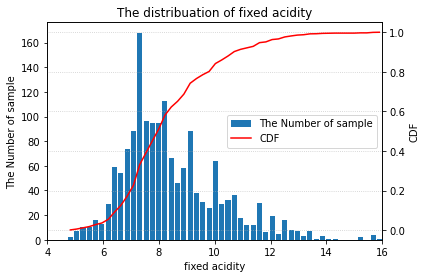

In [60]:
hist, bin_edges, = np.histogram(p, bins=50)
width = (bin_edges[1] - bin_edges[0]) * 0.8

fig, ax1 = plt.subplots()
ax1.bar(bin_edges[1:], hist, width=width, label='The Number of sample')
ax1.set_xlabel("fixed acidity")
ax1.set_ylabel('The Number of sample')

ax2 = ax1.twinx()
ax2.set_xlim([4,16])
cdf = np.cumsum(hist / sum(hist))
ax2.plot(bin_edges[1:], cdf, '-', label='CDF', c='r')
ax2.set_ylabel('CDF')
plt.grid(axis='y', alpha=0.7, linestyle=':')
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='right')
plt.title('The distribuation of fixed acidity')
plt.savefig('The distribuation of fixed acidity',dpi=400,bbox_inches='tight')

In [32]:
df=dataset['volatile acidity']
p=list(df)
p=np.array(p)
print("maxim :",p.max())
print("min :",p.min())
print("mean :", np.mean(p))
print("median :", np.median(p))
print("variance :",np.var(p)) 

maxim : 1.58
min : 0.12
mean : 0.5278205128205128
median : 0.52
variance : 0.0320423261333205


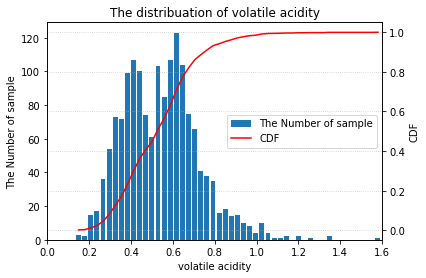

In [33]:
hist, bin_edges, = np.histogram(p, bins=50)
width = (bin_edges[1] - bin_edges[0]) * 0.8

fig, ax1 = plt.subplots()
ax1.bar(bin_edges[1:], hist, width=width, label='The Number of sample')
ax1.set_xlabel("volatile acidity")
ax1.set_ylabel('The Number of sample')

ax2 = ax1.twinx()
ax2.set_xlim([0,1.6])
cdf = np.cumsum(hist / sum(hist))
ax2.plot(bin_edges[1:], cdf, '-', label='CDF', c='r')
ax2.set_ylabel('CDF')
plt.grid(axis='y', alpha=0.7, linestyle=':')
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='right')
plt.title('The distribuation of volatile acidity')
plt.savefig('The distribuation of volatile acidity',dpi=400,bbox_inches='tight')

In [34]:
df=dataset['citric acid']
p=list(df)
p=np.array(p)
print("maxim :",p.max())
print("min :",p.min())
print("mean :", np.mean(p))
print("median :", np.median(p))
print("variance :",np.var(p)) 

maxim : 1.0
min : 0.0
mean : 0.2709756097560976
median : 0.26
variance : 0.03792375112494089


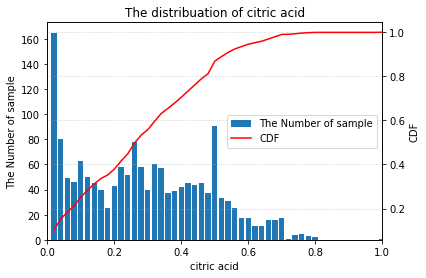

In [35]:
hist, bin_edges, = np.histogram(p, bins=50)
width = (bin_edges[1] - bin_edges[0]) * 0.8

fig, ax1 = plt.subplots()
ax1.bar(bin_edges[1:], hist, width=width, label='The Number of sample')
ax1.set_xlabel("citric acid")
ax1.set_ylabel('The Number of sample')

ax2 = ax1.twinx()
ax2.set_xlim([0,1])
cdf = np.cumsum(hist / sum(hist))
ax2.plot(bin_edges[1:], cdf, '-', label='CDF', c='r')
ax2.set_ylabel('CDF')
plt.grid(axis='y', alpha=0.7, linestyle=':')
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='right')
plt.title('The distribuation of citric acid')
plt.savefig('The distribuation of citric acid',dpi=400,bbox_inches='tight')

In [44]:
def information(df,name,p_bins):
    p=list(df)
    p=np.array(p)
    p_max=p.max()
    print("maxim :",p.max())
    p_min=p.min()
    inter=0.05*(p_max-p_min)
    print("min :",p.min())
    print("mean :", np.mean(p))
    print("median :", np.median(p))
    print("variance :",np.var(p))
    
    hist, bin_edges, = np.histogram(p, bins=p_bins)
    width = (bin_edges[1] - bin_edges[0]) * 0.8

    fig, ax1 = plt.subplots()
    ax1.bar(bin_edges[1:], hist, width=width, label='The Number of sample')
    ax1.set_xlabel(name)
    ax1.set_ylabel('The Number of sample')

    ax2 = ax1.twinx()
    ax2.set_xlim([p_min-inter,p_max+inter])
    cdf = np.cumsum(hist / sum(hist))
    ax2.plot(bin_edges[1:], cdf, '-', label='CDF', c='r')
    ax2.set_ylabel('CDF')
    plt.grid(axis='y', alpha=0.7, linestyle=':')
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(handles1 + handles2, labels1 + labels2, loc='right')
    plt.title('The distribuation of '+name)
    plt.savefig('The distribuation of '+name,dpi=400,bbox_inches='tight')

maxim : 15.5
min : 0.9
mean : 2.53880550343965
median : 2.2
variance : 1.9866539202698996


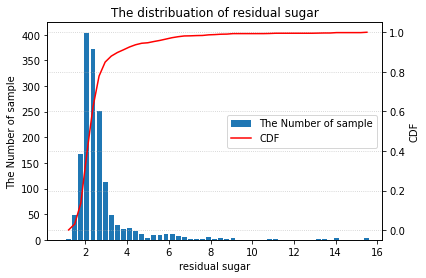

In [57]:
df2=dataset['residual sugar']
information(df2,'residual sugar',50)

maxim : 0.611
min : 0.012
mean : 0.08746654158849279
median : 0.079
variance : 0.0022137573233114347


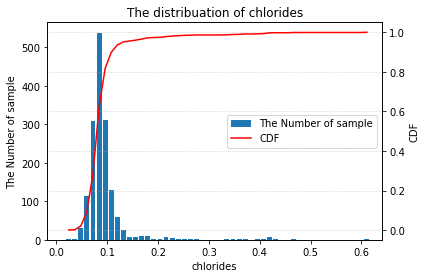

In [45]:
df2=dataset['chlorides']
information(df2,'chlorides',50)

maxim : 72.0
min : 1.0
mean : 15.874921826141339
median : 14.0
variance : 109.34645676374501


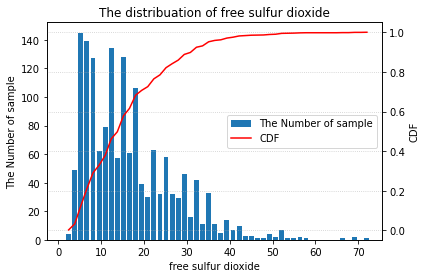

In [61]:
df2=dataset['free sulfur dioxide']
information(df2,'free sulfur dioxide',50)

maxim : 289.0
min : 6.0
mean : 46.46779237023139
median : 38.0
variance : 1081.42563558916


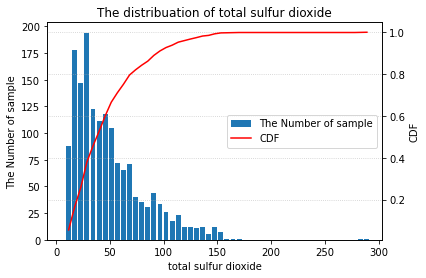

In [50]:
df2=dataset['total sulfur dioxide']
information(df2,'total sulfur dioxide',50)

maxim : 1.00369
min : 0.99007
mean : 0.9967466791744841
median : 0.99675
variance : 3.5598017926307083e-06


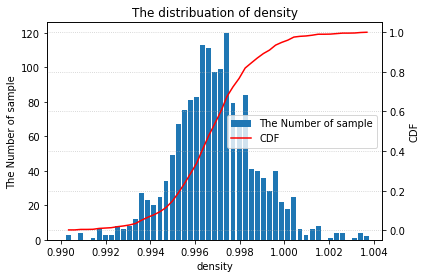

In [49]:
df2=dataset['density']
information(df2,'density',50)

maxim : 4.01
min : 2.74
mean : 3.3111131957473416
median : 3.31
variance : 0.023820274241131787


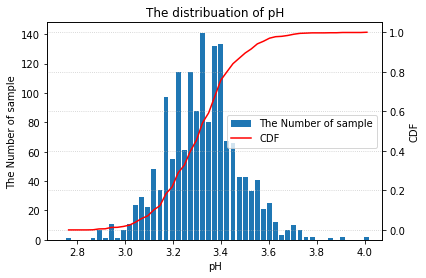

In [51]:
df2=dataset['pH']
information(df2,'pH',50)

maxim : 2.0
min : 0.33
mean : 0.6581488430268917
median : 0.62
variance : 0.02871464701398349


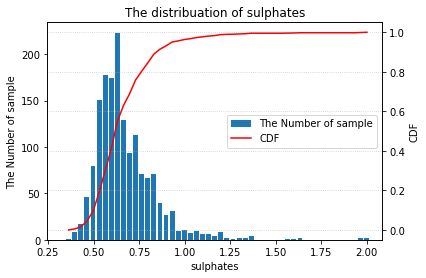

In [52]:
df2=dataset['sulphates']
information(df2,'sulphates',50)

maxim : 14.9
min : 8.4
mean : 10.422983114446529
median : 10.2
variance : 1.1349371714889036


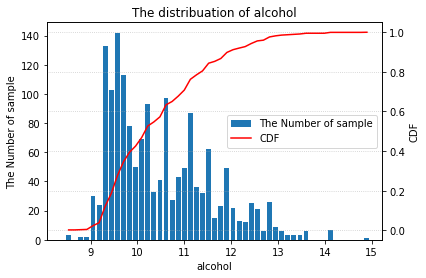

In [53]:
df2=dataset['alcohol']
information(df2,'alcohol',50)

maxim : 8
min : 3
mean : 5.6360225140712945
median : 6.0
variance : 0.6517605398308277


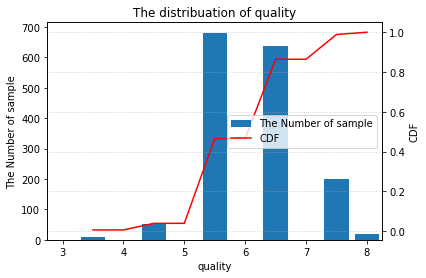

In [55]:
df2=dataset['quality']
information(df2,'quality',10)

In [17]:
df3 = dataset.quality
from collections import Counter
obj=pd.Series(Counter(df3))
obj2=obj.reindex([3,4,5,6,7,8])
obj2.name='Frequency (red wine sample)'
obj2.index.name='Quality of red wine'

In [18]:
obj2

Quality of red wine
3     10
4     53
5    681
6    638
7    199
8     18
Name: Frequency (red wine sample), dtype: int64

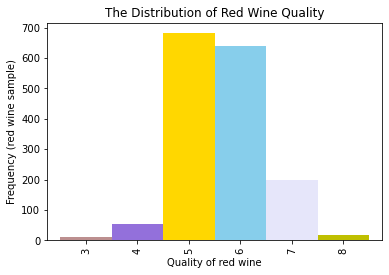

In [24]:
colors='rosybrown','mediumpurple','gold','skyblue','lavender','y'
obj2.plot.bar(width=1,color=colors)
plt.xlabel('Quality of red wine')
plt.ylabel('Frequency (red wine sample)')
plt.title('The Distribution of Red Wine Quality')
plt.savefig('Quality.png',dpi=400,bbox_inches='tight')

In [63]:
df3

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

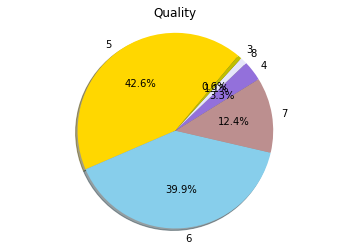

In [80]:
labels='5','6','7','4','8','3'
sizes=681,638,199,53,18,10
colors='gold','skyblue','rosybrown','mediumpurple','lavender','y'
explode=0,0,0,0,0,0
plt.pie(sizes,explode=explode,labels=labels,
        colors=colors,autopct='%1.1f%%',shadow=True,startangle=50)
plt.title('Quality')
plt.axis('equal')
plt.savefig('The distribuation of quality',dpi=400,bbox_inches='tight')
plt.show()

In [216]:
def allfeature(datum):
    fea=list()
    for i in range(len(datum)):
        quality=list(datum['quality'])[i]
        f_acid=list(datum['fixed acidity'])[i]
        v_acid=list(datum['volatile acidity'])[i]
        c_acid=list(datum['citric acid'])[i]
        r_sugar=list(datum['residual sugar'])[i]
        chlor=list(datum['chlorides'])[i]
        f_sulfur=list(datum['free sulfur dioxide'])[i]
        t_sulfur=list(datum['total sulfur dioxide'])[i]
        density=list(datum['density'])[i]
        ph=list(datum['pH'])[i]
        sulphates=list(datum['sulphates'])[i]
        alch=list(datum['alcohol'])[i]
        a=[f_acid]+[v_acid]+[c_acid]+[r_sugar]+[chlor]+[f_sulfur]+[t_sulfur]+[density]+[ph]+[sulphates]+[alch]
        fea.append(a)
    return fea

In [251]:
X=allfeature(dataset)

In [252]:
X=allfeature(dataset)

In [253]:
index=2*len(X)//3
X_train=X[:index]
y_train=y[:index]

In [227]:
X_def=np.array(X_train)
X_def=np.mat(X_train).T

In [228]:
X_def.shape

(11, 1066)

In [229]:
Xmean=np.mean(X_def, axis=1)
X_def2=X_def-Xmean

In [230]:
Xmean

matrix([[0.54735861],
        [0.33264956],
        [0.29354597],
        [0.16545422],
        [0.14755744],
        [0.2101183 ],
        [0.16384375],
        [0.99357662],
        [0.82242096],
        [0.33342871],
        [0.69098556]])

In [231]:
covi=np.cov(X_def2,rowvar=True)
eigenValue, eigenVec=np.linalg.eig(covi)

In [232]:
np.mean(covi,axis=1)

array([ 1.96629023e-03, -3.71620516e-04,  4.48901542e-03,  1.15644654e-03,
        1.03363666e-03,  2.55788499e-03,  2.10782880e-03,  2.63665543e-05,
       -5.29862123e-04,  1.52679918e-03,  4.38946386e-04])

In [213]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#from sklearn.datasets import load_iri

In [254]:
model1 = SelectKBest(chi2, k=5)
model1.fit_transform(X_train,y_train)

array([[ 7.4 ,  0.7 , 11.  , 34.  ,  9.4 ],
       [ 7.8 ,  0.88, 25.  , 67.  ,  9.8 ],
       [ 7.8 ,  0.76, 15.  , 54.  ,  9.8 ],
       ...,
       [10.2 ,  0.29,  6.  , 17.  , 11.8 ],
       [ 8.2 ,  0.74,  5.  , 10.  , 11.8 ],
       [ 7.7 ,  0.61,  6.  , 20.  , 10.2 ]])

In [255]:
model1.scores_

array([1.35167311e+01, 8.57006598e+00, 7.77535264e+00, 5.58986104e+00,
       3.88583391e-01, 1.19890534e+02, 2.58738511e+03, 1.31601862e-04,
       5.26605136e-02, 2.36029075e+00, 3.38807431e+01])

In [125]:
y=list(dataset['quality'])
y_train=y[:index]
y_test=y[index:]

In [126]:
theta,residuals,rank,s = np.linalg.lstsq(X_train, y_train)

<ipython-input-126-929a17f25f37>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta,residuals,rank,s = np.linalg.lstsq(X_train, y_train)


In [127]:
theta

array([ 34.54425386,   0.53344024,  -1.54732811,  -0.22762835,
         0.52547344,  -0.93790647,   0.19427811,  -1.283807  ,
       -31.16354053,  -1.0316844 ,   1.46119436,   4.22502884])

In [128]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

In [129]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [130]:
yPred = model.predict(X_test)

In [131]:
MSE(yPred, y_test)

0.449768743679395

In [148]:
def feature1(datum):
    fea=list()
    for i in range(len(datum)):
        f_acid=list(datum['fixed acidity'])[i]/(datum['fixed acidity'].max())
        v_acid=list(datum['volatile acidity'])[i]/(datum['volatile acidity'].max())
        c_acid=list(datum['citric acid'])[i]/(np.array(datum['citric acid']).max())
        r_sugar=list(datum['residual sugar'])[i]/(np.array(datum['residual sugar']).max())
        chlor=list(datum['chlorides'])[i]/(np.array(datum['chlorides']).max())
        f_sulfur=list(datum['free sulfur dioxide'])[i]/(np.array(datum['free sulfur dioxide']).max())
        t_sulfur=list(datum['total sulfur dioxide'])[i]/(np.array(datum['total sulfur dioxide']).max())
        density=list(datum['density'])[i]/(np.array(datum['density']).max())
        ph=list(datum['pH'])[i]/(np.array(datum['pH']).max())
        sulphates=list(datum['sulphates'])[i]/(np.array(datum['sulphates']).max())
        alch=list(datum['alcohol'])[i]/(np.array(datum['alcohol']).max())
        a=[f_acid]+[v_acid]+[c_acid]+[r_sugar]+[chlor]+[f_sulfur]+[t_sulfur]+[density]+[ph]+[sulphates]+[alch]
        fea.append(a)
    return fea

In [376]:
def feature2(datum,j):
    fea=list()
    for i in range(len(datum)):
        f_acid=list(datum['fixed acidity'])[i]/(datum['fixed acidity'].max())
        v_acid=list(datum['volatile acidity'])[i]/(datum['volatile acidity'].max())
        c_acid=list(datum['citric acid'])[i]/(np.array(datum['citric acid']).max())
        r_sugar=list(datum['residual sugar'])[i]/(np.array(datum['residual sugar']).max())
        chlor=list(datum['chlorides'])[i]/(np.array(datum['chlorides']).max())
        f_sulfur=list(datum['free sulfur dioxide'])[i]/(np.array(datum['free sulfur dioxide']).max())
        t_sulfur=list(datum['total sulfur dioxide'])[i]/(np.array(datum['total sulfur dioxide']).max())
        density=list(datum['density'])[i]/(np.array(datum['density']).max())
        ph=list(datum['pH'])[i]/(np.array(datum['pH']).max())
        sulphates=list(datum['sulphates'])[i]/(np.array(datum['sulphates']).max())
        alch=list(datum['alcohol'])[i]/(np.array(datum['alcohol']).max())
        a=[1]+[f_acid]+[v_acid]+[c_acid]+[r_sugar]+[chlor]+[f_sulfur]+[t_sulfur]+[density]+[ph]+[sulphates]+[alch]
        a.pop(j) 
        fea.append(a)
    return fea

In [336]:
y_train=y[:index]
y_test=y[index:]
mse_min=0.5
j=1
while j <12:
    X=feature2(dataset,j)
    X_train=X[:index]
    X_test=X[index:]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X_train,y_train)
    yPred = model.predict(X_test)
    a=MSE(yPred, y_test)-0.449768743679395
    print(j,a)
    j+=1

1 -5.917579698905273e-05
2 0.03174141969802663
3 -5.489917844647696e-05
4 -0.0019288777140290536
5 0.007705739866038286
6 0.0015969960181775877
7 -0.003396528902697704
8 -0.0016600918420661692
9 0.001948833806517114
10 0.023232617637565234
11 0.023019413953293544


In [330]:
X1=feature2(dataset)
X1_train=X1[:index]
X1_test=X1[index:]

In [331]:
model = sklearn.linear_model.LinearRegression()
model.fit(X1_train,y_train)

LinearRegression()

In [333]:
yPred = model.predict(X1_test)

In [ ]:
-density :0.44810865183732884
-fre sulfur 0.4436448731400123
-total sulfur:0.4287480507598252
-sulphates: 0.4540734611989402
-alcohol:0.48425494644605466
-chlor:0.4353194608194653
-[c_acid]:0.4262891888004292
-[ph]:0.4279550897901883
-[r_sugar]:0.4262986631852193

In [334]:
MSE(yPred, y_test)

0.4262986631852193

In [430]:
def feature3(datum):
    fea=list()
    for i in range(len(datum)):
        f_acid=list(datum['fixed acidity'])[i]/(datum['fixed acidity'].max())
        v_acid=list(datum['volatile acidity'])[i]/(datum['volatile acidity'].max())
        c_acid=list(datum['citric acid'])[i]/(np.array(datum['citric acid']).max())
        r_sugar=list(datum['residual sugar'])[i]/(np.array(datum['residual sugar']).max())
        chlor=list(datum['chlorides'])[i]/(np.array(datum['chlorides']).max())
        f_sulfur=list(datum['free sulfur dioxide'])[i]/(np.array(datum['free sulfur dioxide']).max())
        t_sulfur=list(datum['total sulfur dioxide'])[i]/(np.array(datum['total sulfur dioxide']).max())
        density=list(datum['density'])[i]/(np.array(datum['density']).max())
        ph=list(datum['pH'])[i]/(np.array(datum['pH']).max())
        sulphates=list(datum['sulphates'])[i]/(np.array(datum['sulphates']).max())
        alch=list(datum['alcohol'])[i]/(np.array(datum['alcohol']).max())
        a=[1]+[f_acid]+[v_acid]+[r_sugar]+[chlor]+[ph]+[sulphates]+[alch]
        fea.append(a)
    return fea

In [431]:
X2=feature3(dataset)
X2_train=X2[:index]
X2_test=X2[index:]

In [432]:
y2=[d>6.5 for d in y] 
y2_train=y2[:index]
y2_test=y2[index:]

In [433]:
y1[:10]

[False, False, False, False, False, False, False, True, True, False]

In [435]:
mod2= linear_model.LogisticRegression(C=0.001, class_weight='balanced')
mod2.fit(X2_train, y2_train)

LogisticRegression(C=0.001, class_weight='balanced')

In [436]:
test_predictions = mod2.predict(X2_test)
sum(test_predictions == y2_test) / len(y2_test)

0.7692307692307693

In [437]:
TP_ = np.logical_and(test_predictions, y2_test)
FP_ = np.logical_and(test_predictions, np.logical_not(y2_test))
TN_ = np.logical_and(np.logical_not(test_predictions), np.logical_not(y2_test))
FN_ = np.logical_and(np.logical_not(test_predictions), y2_test)

In [438]:
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)
print(TP,TN,FP,FN)
(TP + TN) / (TP + FP + TN + FN) 

54 356 114 9


0.7692307692307693

In [439]:
# BER
1 - 0.5*(TP / (TP + FN) + TN / (TN + FP)) 

0.19270516717325226

In [397]:
data=dataset[['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','pH','sulphates','alcohol']][:index+1]

In [398]:
labels=y_train

In [471]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', )
knn.fit(X2_train, y2_train)
y_pred = knn.predict(X2_test)

print('accuracy_score：', sum(y_pred == y2_test) / len(y2_test))

accuracy_score： 0.8667917448405253


In [472]:
TP=0
TN=0
FP=0
FN=0
for i in range (len(y2_test)):
    if y2_test[i]==y_pred[i]:
        if y2_test[i]==0: TN+=1
        else: TP+=1
    else:
        if y2_test[i]==0:FP+=1
        else: FN+=1
# BER
print(1 - 0.5*((TP / (TP + FN)) + (TN / (TN + FP))))

0.3573117190138466
